## 2-IMDB数据集下载和探索 ##

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.13.1


In [2]:
# 实现自己的datasets
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# ValueError: Object arrays cannot be loaded when allow_pickle=False
# 回退 numpy 版本小于<1.16.3，pip install numpy==1.16.0

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### 由于神经网络的输入必须具有相同长度, 所以需要转换 ###
1. 使用one-hot 编码
2. 使用词向量-pad to same length

In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [9]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [10]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [11]:
def my_model():
    vocab_size = 10000

    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, 16))
    model.add(keras.layers.GlobalAveragePooling1D())
    model.add(keras.layers.Dense(16, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
    
    return model

In [12]:
model = my_model()

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [15]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [16]:
"""
InternalError: Blas GEMM launch failed : a.shape=(512, 16), b.shape=(16, 16), m=512, n=16, k=16
	 [[{{node dense/MatMul}}]]
	 [[{{node loss/mul}}]]

"""
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [17]:
#cfg = tf.ConfigProto(allow_soft_placement=True )
#cfg.gpu_options.allow_growth = True
"""
如果你是使用 GPU 版 TensorFlow 的话，并且你想在显卡高占用率的情况下（比如玩游戏）训练模型，
那你要注意在初始化 Session 的时候为其分配固定数量的显存，否则可能会在开始训练的时候直接报错退出：
InternalError: Blas GEMM launch failed : a.shape=(512, 16), b.shape=(16, 16), m=512, n=16, k=16
	 [[{{node dense/MatMul}}]]
	 [[{{node loss/mul}}]]
"""
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))  

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 75us/sample - loss: 0.6918 - acc: 0.5555 - val_loss: 0.6897 - val_acc: 0.6050
Epoch 2/40
15000/15000 [==============================] - 0s 12us/sample - loss: 0.6854 - acc: 0.7026 - val_loss: 0.6807 - val_acc: 0.7344
Epoch 3/40
15000/15000 [==============================] - 0s 12us/sample - loss: 0.6719 - acc: 0.7546 - val_loss: 0.6643 - val_acc: 0.7565
Epoch 4/40
15000/15000 [==============================] - 0s 13us/sample - loss: 0.6491 - acc: 0.7612 - val_loss: 0.6385 - val_acc: 0.7606
Epoch 5/40
15000/15000 [==============================] - 0s 12us/sample - loss: 0.6161 - acc: 0.7930 - val_loss: 0.6040 - val_acc: 0.7866
Epoch 6/40
15000/15000 [==============================] - 0s 11us/sample - loss: 0.5745 - acc: 0.8131 - val_loss: 0.5640 - val_acc: 0.8038
Epoch 7/40
15000/15000 [==============================] - 0s 11us/sa

In [19]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 32us/sample - loss: 0.3292 - acc: 0.8719
[0.32921384448051455, 0.87188]


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

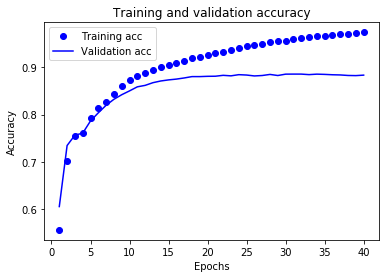

In [22]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3-THUCNews数据集下载和探索 ## 

In [25]:
import os
base_dir = 'data/cnews'
train_dir = os.path.join(base_dir, 'cnews.train.txt')
test_dir = os.path.join(base_dir, 'cnews.test.txt')
val_dir = os.path.join(base_dir, 'cnews.val.txt')
vocab_dir = os.path.join(base_dir, 'cnews.vocab.txt')

save_dir = 'checkpoints/textcnn'
save_path = os.path.join(save_dir, 'best_validation')  # 最佳验证结果保存路径

In [28]:
import sys
from collections import Counter

import numpy as np
#import tensorflow.contrib.keras as kr

if sys.version_info[0] > 2:
    is_py3 = True
else:
    reload(sys)
    sys.setdefaultencoding("utf-8")
    is_py3 = False

def native_word(word, encoding='utf-8'):
    """如果在python2下面使用python3训练的模型，可考虑调用此函数转化一下字符编码"""
    if not is_py3:
        return word.encode(encoding)
    else:
        return word


def native_content(content):
    if not is_py3:
        return content.decode('utf-8')
    else:
        return content


def open_file(filename, mode='r'):
    """
    常用文件操作，可在python2和python3间切换.
    mode: 'r' or 'w' for read or write
    """
    if is_py3:
        return open(filename, mode, encoding='utf-8', errors='ignore')
    else:
        return open(filename, mode)


def read_file(filename):
    """读取文件数据"""
    contents, labels = [], []
    with open_file(filename) as f:
        for line in f:
            try:
                label, content = line.strip().split('\t')
                if content:
                    contents.append(list(native_content(content)))
                    labels.append(native_content(label))
            except:
                pass
    return contents, labels


def build_vocab(train_dir, vocab_dir, vocab_size=5000):
    """根据训练集构建词汇表，存储"""
    data_train, _ = read_file(train_dir)

    all_data = []
    for content in data_train:
        all_data.extend(content)

    counter = Counter(all_data)
    count_pairs = counter.most_common(vocab_size - 1)
    words, _ = list(zip(*count_pairs))
    # 添加一个 <PAD> 来将所有文本pad为同一长度
    words = ['<PAD>'] + list(words)
    open_file(vocab_dir, mode='w').write('\n'.join(words) + '\n')


def read_vocab(vocab_dir):
    """读取词汇表"""
    # words = open_file(vocab_dir).read().strip().split('\n')
    with open_file(vocab_dir) as fp:
        # 如果是py2 则每个值都转化为unicode
        words = [native_content(_.strip()) for _ in fp.readlines()]
    word_to_id = dict(zip(words, range(len(words))))
    return words, word_to_id


def read_category():
    """读取分类目录，固定"""
    categories = ['体育', '财经', '房产', '家居', '教育', '科技', '时尚', '时政', '游戏', '娱乐']

    categories = [native_content(x) for x in categories]

    cat_to_id = dict(zip(categories, range(len(categories))))

    return categories, cat_to_id


def to_words(content, words):
    """将id表示的内容转换为文字"""
    return ''.join(words[x] for x in content)


def process_file(filename, word_to_id, cat_to_id, max_length=600):
    """将文件转换为id表示"""
    contents, labels = read_file(filename)

    data_id, label_id = [], []
    for i in range(len(contents)):
        data_id.append([word_to_id[x] for x in contents[i] if x in word_to_id])
        label_id.append(cat_to_id[labels[i]])

    # 使用keras提供的pad_sequences来将文本pad为固定长度
    x_pad = keras.preprocessing.sequence.pad_sequences(data_id, max_length)
    y_pad = keras.utils.to_categorical(label_id, num_classes=len(cat_to_id))  # 将标签转换为one-hot表示

    return x_pad, y_pad


def batch_iter(x, y, batch_size=64):
    """生成批次数据"""
    data_len = len(x)
    num_batch = int((data_len - 1) / batch_size) + 1

    indices = np.random.permutation(np.arange(data_len))
    x_shuffle = x[indices]
    y_shuffle = y[indices]

    for i in range(num_batch):
        start_id = i * batch_size
        end_id = min((i + 1) * batch_size, data_len)
        yield x_shuffle[start_id:end_id], y_shuffle[start_id:end_id]

In [31]:
# 载入训练集与验证集
if not os.path.exists(vocab_dir):  # 如果不存在词汇表，重建
        build_vocab(train_dir, vocab_dir, config.vocab_size)
categories, cat_to_id = read_category()
words, word_to_id = read_vocab(vocab_dir)
x_train, y_train = process_file(train_dir, word_to_id, cat_to_id, 600)
x_val, y_val = process_file(val_dir, word_to_id, cat_to_id, 600)



x_train shape:  (50000, 600)
y_train shape:  (50000, 10)
x_val shape:  (5000, 600)
y_val shape:  (5000, 10)


In [32]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_val shape: ", x_val.shape)
print("y_val shape: ", y_val.shape)

x_train shape:  (50000, 600)
y_train shape:  (50000, 10)
x_val shape:  (5000, 600)
y_val shape:  (5000, 10)


## 4-召回率、准确率、ROC曲线、AUC、PR曲线 ##

竟然有ROC图绘图代码，引用一波了。
[机器学习之类别不平衡问题 (2) —— ROC和PR曲线](https://www.imooc.com/article/48072)

ROC曲线的绘制方法：假设有P个正例，N个反例，首先拿到分类器对于每个样本预测为正例的概率，根据概率对所有样本进行逆序排列，然后将分类阈值设为最大，即把所有样本均预测为反例，此时图上的点为 (0,0)。然后将分类阈值依次设为每个样本的预测概率，即依次将每个样本划分为正例，如果该样本为真正例，则TP+1，即TPR+1PTPR+1P; 如果该样本为负例，则FP+1，即FPR+1NFPR+1N。最后的到所有样本点的TPR和FPR值，用线段相连。

PR (Precision Recall) 曲线
PR曲线展示的是Precision vs Recall的曲线，PR曲线与ROC曲线的相同点是都采用了TPR (Recall)，都可以用AUC来衡量分类器的效果。不同点是ROC曲线使用了FPR，而PR曲线使用了Precision，因此PR曲线的两个指标都聚焦于正例。类别不平衡问题中由于主要关心正例，所以在此情况下PR曲线被广泛认为优于ROC曲线。
